In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# VERİYE GENEL BAKIŞ

In [2]:
data = pd.read_csv(r"SpotifyFeatures.csv")

In [3]:
data

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [4]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [5]:
data.head(20)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.9440,0


# FEATURE ENGINEERING

Feat yapan sanatçıları ayıklamaca

In [6]:
data['feat_in_track'] = data['track_name'].str.contains('feat', case=False, na=False)
data['feat_in_track_without'] = data['track_name'].str.contains('feat.', case=False, na=False)

In [7]:
data.loc[data['feat_in_track'] == True]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,feat_in_track,feat_in_track_without
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,True,True
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,True,True
53,Code Orange,2XhJpVPyqhDU0EPDAIBpwe,The Hunt (feat. Corey Taylor),0.000026,0.121,226906,0.982,0.018700,6,0.6410,-0.447,1,0.1350,75.075,4,0.2280,44,True,True
62,Kiana Ledé,2PQVLVJ1J57t7uQO4Y2Mzq,Fairplay (feat. ASAP Ferg) - Remix,0.539000,0.733,167920,0.489,0.000190,8,0.1020,-9.538,1,0.3060,139.949,4,0.6890,2,True,True
66,Xavier Wulf,1QozDHVFxNin5IQvFG7HZ8,Homecoming (feat. Bankroll Rico),0.239000,0.914,184130,0.565,0.000000,9,0.1010,-5.100,1,0.3890,133.021,4,0.6810,42,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130592,Manila Killa,2uF9MllYoEuXzUnMudZG4c,"Everyday, Everyday (feat. Nevve)",0.025400,0.327,219497,0.698,0.000000,1,0.0849,-5.136,1,0.0428,92.289,4,0.2560,22,True,True
130596,Kasbo,05INdkUo3Fw9ojWbyuMOsR,The Voice Says (feat. Charlie Kim),0.565000,0.191,225207,0.563,0.006100,4,0.1700,-7.472,1,0.0344,146.287,4,0.0541,44,True,True
130599,El Komander,5knHoblboiCyVpwFziiaCM,Trato De Muerte (feat. Los Buchones De Culiacan),0.753000,0.708,199800,0.568,0.000039,2,0.2590,-6.734,1,0.0377,115.000,3,0.9630,35,True,True
130602,El Komander,0ClsgKeIiJNva3YgniroEq,Negocio Y Amistad (feat. Chayin Rubio),0.152000,0.704,131293,0.914,0.000000,5,0.0713,-2.141,0,0.2220,108.333,3,0.9060,32,True,True


In [8]:
data.loc[data['feat_in_track_without'] == True]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,feat_in_track,feat_in_track_without
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,True,True
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,True,True
53,Code Orange,2XhJpVPyqhDU0EPDAIBpwe,The Hunt (feat. Corey Taylor),0.000026,0.121,226906,0.982,0.018700,6,0.6410,-0.447,1,0.1350,75.075,4,0.2280,44,True,True
62,Kiana Ledé,2PQVLVJ1J57t7uQO4Y2Mzq,Fairplay (feat. ASAP Ferg) - Remix,0.539000,0.733,167920,0.489,0.000190,8,0.1020,-9.538,1,0.3060,139.949,4,0.6890,2,True,True
66,Xavier Wulf,1QozDHVFxNin5IQvFG7HZ8,Homecoming (feat. Bankroll Rico),0.239000,0.914,184130,0.565,0.000000,9,0.1010,-5.100,1,0.3890,133.021,4,0.6810,42,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130592,Manila Killa,2uF9MllYoEuXzUnMudZG4c,"Everyday, Everyday (feat. Nevve)",0.025400,0.327,219497,0.698,0.000000,1,0.0849,-5.136,1,0.0428,92.289,4,0.2560,22,True,True
130596,Kasbo,05INdkUo3Fw9ojWbyuMOsR,The Voice Says (feat. Charlie Kim),0.565000,0.191,225207,0.563,0.006100,4,0.1700,-7.472,1,0.0344,146.287,4,0.0541,44,True,True
130599,El Komander,5knHoblboiCyVpwFziiaCM,Trato De Muerte (feat. Los Buchones De Culiacan),0.753000,0.708,199800,0.568,0.000039,2,0.2590,-6.734,1,0.0377,115.000,3,0.9630,35,True,True
130602,El Komander,0ClsgKeIiJNva3YgniroEq,Negocio Y Amistad (feat. Chayin Rubio),0.152000,0.704,131293,0.914,0.000000,5,0.0713,-2.141,0,0.2220,108.333,3,0.9060,32,True,True


In [9]:
index_with_feat = set(data.loc[data['feat_in_track'] == True].index)
index_without_feat = set(data.loc[data['feat_in_track_without'] == True].index)

index_difference = index_with_feat - index_without_feat
data.loc[index_difference] #these ar just contains "defeat and safeat etc. our aim is "feat.""

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,feat_in_track,feat_in_track_without
122394,Architects,5T1uebljPkznNMQHnBnPDy,Death Is Not Defeat,0.000299,0.495,225040,0.929,0.001310,8,0.1140,-4.792,0,0.0526,95.013,4,0.2220,48,True,False
16195,Almighty Suspect,6FR2hlqPycfVIAoYq7BD1E,WhereYoSafeAt,0.005250,0.574,106083,0.704,0.000000,8,0.0976,-6.291,1,0.9080,205.758,4,0.0975,45,True,False
5988,Preme,2z0A8rnTZ6H7aZD6HPTErf,No Defeat,0.006220,0.858,211084,0.579,0.000108,5,0.0996,-7.564,1,0.2560,155.055,4,0.3180,21,True,False
501,Ben Howard,6pmI8T6gylas6bM0P1GELa,The Defeat,0.058300,0.406,353280,0.653,0.627000,0,0.1110,-8.879,1,0.0384,89.094,4,0.1180,49,True,False


In [10]:
data['feat_in_track'] = data['track_name'].str.contains('feat.', case=False, na=False)
data = data.drop(columns='feat_in_track_without')

In [11]:
data.loc[data['feat_in_track'] == True]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,feat_in_track
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,True
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,True
53,Code Orange,2XhJpVPyqhDU0EPDAIBpwe,The Hunt (feat. Corey Taylor),0.000026,0.121,226906,0.982,0.018700,6,0.6410,-0.447,1,0.1350,75.075,4,0.2280,44,True
62,Kiana Ledé,2PQVLVJ1J57t7uQO4Y2Mzq,Fairplay (feat. ASAP Ferg) - Remix,0.539000,0.733,167920,0.489,0.000190,8,0.1020,-9.538,1,0.3060,139.949,4,0.6890,2,True
66,Xavier Wulf,1QozDHVFxNin5IQvFG7HZ8,Homecoming (feat. Bankroll Rico),0.239000,0.914,184130,0.565,0.000000,9,0.1010,-5.100,1,0.3890,133.021,4,0.6810,42,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130592,Manila Killa,2uF9MllYoEuXzUnMudZG4c,"Everyday, Everyday (feat. Nevve)",0.025400,0.327,219497,0.698,0.000000,1,0.0849,-5.136,1,0.0428,92.289,4,0.2560,22,True
130596,Kasbo,05INdkUo3Fw9ojWbyuMOsR,The Voice Says (feat. Charlie Kim),0.565000,0.191,225207,0.563,0.006100,4,0.1700,-7.472,1,0.0344,146.287,4,0.0541,44,True
130599,El Komander,5knHoblboiCyVpwFziiaCM,Trato De Muerte (feat. Los Buchones De Culiacan),0.753000,0.708,199800,0.568,0.000039,2,0.2590,-6.734,1,0.0377,115.000,3,0.9630,35,True
130602,El Komander,0ClsgKeIiJNva3YgniroEq,Negocio Y Amistad (feat. Chayin Rubio),0.152000,0.704,131293,0.914,0.000000,5,0.0713,-2.141,0,0.2220,108.333,3,0.9060,32,True


In [12]:
import pandas as pd

# 'feat. ' kelimesinden sonraki her şeyi yakalayan düzenli ifade
pattern = r'feat\. (.*)'

# 'feat_in_track' sütunu True olan satırları seç
rows_with_feat = data.loc[data['feat_in_track'] == True]

# 'track_name' sütununda 'feat. ' kelimesinden sonrasını al ve 'featers' sütununa kaydet
data.loc[data['feat_in_track'] == True, 'featers'] = rows_with_feat['track_name'].str.extract(pattern, expand=False)
data.loc[data['featers'].notna() & data['featers'].str.endswith(')'), 'featers'] = data['featers'].str.slice(0, -1)

In [13]:
data

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,feat_in_track,featers
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,True,"2 Chainz, Big Sean, Nicki Minaj"
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,True,A$AP Rocky
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56,False,NaN
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0,False,NaN
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57,False,NaN
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60,False,NaN
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47,False,NaN
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50,False,NaN


In [14]:
data.loc[data['feat_in_track'] == True]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,feat_in_track,featers
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,True,"2 Chainz, Big Sean, Nicki Minaj"
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,True,A$AP Rocky
53,Code Orange,2XhJpVPyqhDU0EPDAIBpwe,The Hunt (feat. Corey Taylor),0.000026,0.121,226906,0.982,0.018700,6,0.6410,-0.447,1,0.1350,75.075,4,0.2280,44,True,Corey Taylor
62,Kiana Ledé,2PQVLVJ1J57t7uQO4Y2Mzq,Fairplay (feat. ASAP Ferg) - Remix,0.539000,0.733,167920,0.489,0.000190,8,0.1020,-9.538,1,0.3060,139.949,4,0.6890,2,True,ASAP Ferg) - Remix
66,Xavier Wulf,1QozDHVFxNin5IQvFG7HZ8,Homecoming (feat. Bankroll Rico),0.239000,0.914,184130,0.565,0.000000,9,0.1010,-5.100,1,0.3890,133.021,4,0.6810,42,True,Bankroll Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130592,Manila Killa,2uF9MllYoEuXzUnMudZG4c,"Everyday, Everyday (feat. Nevve)",0.025400,0.327,219497,0.698,0.000000,1,0.0849,-5.136,1,0.0428,92.289,4,0.2560,22,True,Nevve
130596,Kasbo,05INdkUo3Fw9ojWbyuMOsR,The Voice Says (feat. Charlie Kim),0.565000,0.191,225207,0.563,0.006100,4,0.1700,-7.472,1,0.0344,146.287,4,0.0541,44,True,Charlie Kim
130599,El Komander,5knHoblboiCyVpwFziiaCM,Trato De Muerte (feat. Los Buchones De Culiacan),0.753000,0.708,199800,0.568,0.000039,2,0.2590,-6.734,1,0.0377,115.000,3,0.9630,35,True,Los Buchones De Culiacan
130602,El Komander,0ClsgKeIiJNva3YgniroEq,Negocio Y Amistad (feat. Chayin Rubio),0.152000,0.704,131293,0.914,0.000000,5,0.0713,-2.141,0,0.2220,108.333,3,0.9060,32,True,Chayin Rubio


In [15]:
# 'featers' sütununu virgülden ayır ve sonucu bir DataFrame'e dönüştür
featers_df = data['featers'].str.split(',', expand=True)

# Yeni sütunları 'feater1', 'feater2', vb. olarak adlandır ve boşlukları temizle
for i in range(featers_df.shape[1]):
    data[f'feater{i+1}'] = featers_df[i].str.strip()

In [16]:
data[["featers","feater1","feater2","feater3","feater4"]]

,featers,feater1,feater2,feater3,feater4
0,"2 Chainz, Big Sean, Nicki Minaj",2 Chainz,Big Sean,Nicki Minaj,None
1,A$AP Rocky,A$AP Rocky,None,None,None
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
130658,NaN,NaN,NaN,NaN,NaN
130659,NaN,NaN,NaN,NaN,NaN
130660,NaN,NaN,NaN,NaN,NaN
130661,NaN,NaN,NaN,NaN,NaN


In [17]:
import numpy as np

data = data.replace(np.nan, np.nan)

In [18]:
data[["featers","feater1","feater2","feater3","feater4"]]

,featers,feater1,feater2,feater3,feater4
0,"2 Chainz, Big Sean, Nicki Minaj",2 Chainz,Big Sean,Nicki Minaj,NaN
1,A$AP Rocky,A$AP Rocky,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
130658,NaN,NaN,NaN,NaN,NaN
130659,NaN,NaN,NaN,NaN,NaN
130660,NaN,NaN,NaN,NaN,NaN
130661,NaN,NaN,NaN,NaN,NaN


In [19]:
data.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity', 'feat_in_track', 'featers', 'feater1', 'feater2',
       'feater3', 'feater4', 'feater5', 'feater6', 'feater7', 'feater8',
       'feater9', 'feater10'],
      dtype='object')

# HANGİ SANATÇININ KAÇ ŞARKISI VAR

In [20]:
data["popularity"]

0         15
1          0
2         56
3          0
4          0
          ..
130658    57
130659    60
130660    47
130661    50
130662    55
Name: popularity, Length: 130663, dtype: int64

In [21]:
howmanysongs = data["artist_name"].value_counts().copy().reset_index().rename(columns={"index":"artists","artist_name":"count"})

In [22]:
howmanysongs

,artists,count
0,Johann Sebastian Bach,3621
1,Wolfgang Amadeus Mozart,1755
2,Armin van Buuren,1124
3,Ludwig van Beethoven,928
4,Frédéric Chopin,614
...,...,...
34616,Mozaics,1
34617,Vanja Radovanović,1
34618,Hounds,1
34619,CHIZZY JAY,1


In [23]:
for i in range(1, 11):
    globals()[f'feater{i}'] = data[f"feater{i}"].value_counts().copy()
    globals()[f'feater{i}'] = globals()[f'feater{i}'].reset_index().rename(columns={"index":"artists",f'feater{i}':"count"})

In [24]:
featers = pd.concat([feater1, feater2,feater3,feater4,feater5,feater6,feater7,feater8,feater9,feater10]).groupby('artists').sum().reset_index()
featers = featers.loc[featers["artists"] != ""]
featers = featers.sort_values(by="count", ascending=False)
featers.reset_index(drop=True, inplace=True)

In [25]:
featers

,artists,count
0,Gucci Mane,33
1,Young Thug,30
2,Lil Baby,30
3,Gunna,26
4,Ty Dolla $ign,26
...,...,...
5257,Holly,1
5258,Hit-Boy,1
5259,Hillary Lindsey,1
5260,Hijos de Garcia & Fuerza Regida,1


In [26]:
howmanysongs

,artists,count
0,Johann Sebastian Bach,3621
1,Wolfgang Amadeus Mozart,1755
2,Armin van Buuren,1124
3,Ludwig van Beethoven,928
4,Frédéric Chopin,614
...,...,...
34616,Mozaics,1
34617,Vanja Radovanović,1
34618,Hounds,1
34619,CHIZZY JAY,1


In [27]:
howmanysongsfeaters = pd.concat([howmanysongs,featers]).groupby('artists').sum().reset_index().sort_values(by="count", ascending=False)
howmanysongsfeaters.reset_index(drop=True, inplace=True)

In [28]:
howmanysongsfeaters

,artists,count
0,Johann Sebastian Bach,3621
1,Wolfgang Amadeus Mozart,1755
2,Armin van Buuren,1124
3,Ludwig van Beethoven,928
4,Frédéric Chopin,614
...,...,...
38646,KelleyYoungan,1
38647,Kelleigh Bannen,1
38648,Kellam Worship,1
38649,Kell Smith,1


howmanysongsfeaters, howmanysongs ve featers columnları ile sanatçı şarkı sayılarını analiz edebilirim.

# HANGİ SANATÇI NE KADAR POPÜLER

In [29]:
popularity = data[["artist_name","popularity"]].groupby('artist_name').sum().sort_values(by="popularity", ascending=False).reset_index().copy()

In [30]:
popularity

,artist_name,popularity
0,Johann Sebastian Bach,32155
1,Wolfgang Amadeus Mozart,18318
2,Armin van Buuren,16729
3,Ludwig van Beethoven,10931
4,Frédéric Chopin,8380
...,...,...
34616,Dannywitdaflicks,0
34617,Myla Lone,0
34618,King Kuma,0
34619,Ayewaken,0


In [31]:
feater1popularity = data[["feater1","popularity"]].groupby('feater1').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater1":"artist_name"}).copy()
feater2popularity = data[["feater2","popularity"]].groupby('feater2').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater2":"artist_name"}).copy()
feater3popularity = data[["feater3","popularity"]].groupby('feater3').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater3":"artist_name"}).copy()
feater4popularity = data[["feater4","popularity"]].groupby('feater4').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater4":"artist_name"}).copy()
feater5popularity = data[["feater5","popularity"]].groupby('feater5').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater5":"artist_name"}).copy()
feater6popularity = data[["feater6","popularity"]].groupby('feater6').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater6":"artist_name"}).copy()
feater7popularity = data[["feater7","popularity"]].groupby('feater7').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater7":"artist_name"}).copy()
feater8popularity = data[["feater8","popularity"]].groupby('feater8').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater8":"artist_name"}).copy()
feater9popularity = data[["feater9","popularity"]].groupby('feater9').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater9":"artist_name"}).copy()
feater10popularity = data[["feater10","popularity"]].groupby('feater10').sum().sort_values(by="popularity", ascending=False).reset_index().rename(columns={"feater10":"artist_name"}).copy()

In [32]:
featerspopularity = pd.concat([feater1popularity,feater2popularity,feater3popularity,feater4popularity,feater5popularity,feater6popularity,feater7popularity,feater8popularity,feater9popularity,feater10popularity]).groupby('artist_name').sum().reset_index().sort_values(by="popularity", ascending=False)
featerspopularity.reset_index(drop=True, inplace=True)

In [33]:
featerspopularity

,artist_name,popularity
0,Lil Baby,1687
1,Gunna,1504
2,Ty Dolla $ign,1441
3,Young Thug,1353
4,Offset,1164
...,...,...
5258,Truth Ali,0
5259,Roy Demeo & Audio Stepchild,0
5260,Marinel,0
5261,De$to,0


In [34]:
popularitywithfeaters = pd.concat([popularity,featerspopularity]).groupby('artist_name').sum().reset_index().sort_values(by="popularity", ascending=False)
popularitywithfeaters.reset_index(drop=True, inplace=True)

In [35]:
popularitywithfeaters

,artist_name,popularity
0,Johann Sebastian Bach,32155
1,Wolfgang Amadeus Mozart,18318
2,Armin van Buuren,16729
3,Ludwig van Beethoven,10931
4,Frédéric Chopin,8380
...,...,...
38647,Srikanth,0
38648,Enoch Da Prophet,0
38649,Sravana Bhargavi,0
38650,Sr. S,0


popularity, featerspopularity ve popularitywithfeaters ile popülarite analiz edebilirim

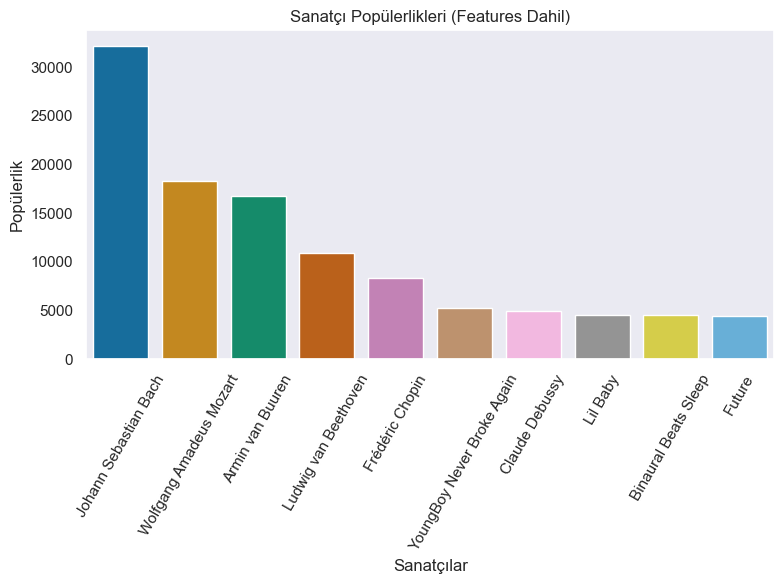

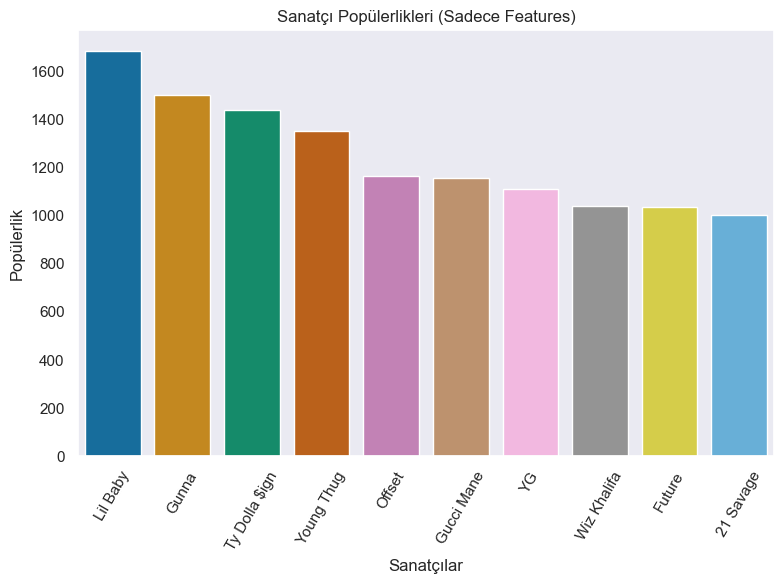

In [36]:
sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='popularity', data=popularity.sort_values(by="popularity", ascending=False)[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Popülerlik")
plt.title("Sanatçı Popülerlikleri (Features Dahil Değil)")

plt.xticks(rotation=60)  # Eksen etiketlerini daha fazla döndürme
plt.tight_layout()  # Grafikleri sığdırma
plt.savefig("grafik1.png")
plt.close()

sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='popularity', data=popularitywithfeaters[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Popülerlik")
plt.title("Sanatçı Popülerlikleri (Features Dahil)")

plt.xticks(rotation=60)
plt.tight_layout()  # Grafikleri sığdırma
plt.savefig("grafik2.png")
# Grafiği gösterme
plt.show()

sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='popularity', data=featerspopularity[:10], palette="colorblind")


# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Popülerlik")
plt.title("Sanatçı Popülerlikleri (Sadece Features)")

plt.xticks(rotation=60)
plt.tight_layout()  # Grafikleri sığdırma
plt.savefig("grafik3.png")
# Grafiği gösterme
plt.show()

# EN GÜRÜLTÜLÜ ŞARKILAR HANGİLERİ

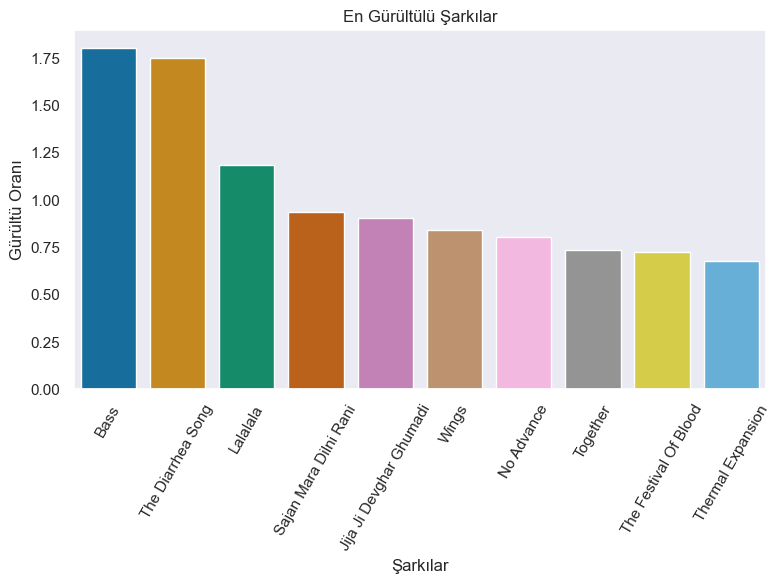

In [37]:
sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='track_name', y='loudness', data=data.sort_values(by="loudness", ascending=False)[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Şarkılar")
plt.ylabel("Gürültü Oranı")
plt.title("En Gürültülü Şarkılar")

plt.xticks(rotation=60)
plt.tight_layout()  # Grafikleri sığdırma
plt.savefig("grafik4.png")
# Grafiği gösterme
plt.show()

# DANS EDİLEBİLİRLİKLER

In [38]:
danceability = data[["artist_name","danceability"]].groupby('artist_name').sum().sort_values(by="danceability", ascending=False).reset_index().copy()
feater1danceability = data[["feater1","danceability"]].groupby('feater1').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater1":"artist_name"}).copy()
feater2danceability = data[["feater2","danceability"]].groupby('feater2').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater2":"artist_name"}).copy()
feater3danceability = data[["feater3","danceability"]].groupby('feater3').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater3":"artist_name"}).copy()
feater4danceability = data[["feater4","danceability"]].groupby('feater4').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater4":"artist_name"}).copy()
feater5danceability = data[["feater5","danceability"]].groupby('feater5').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater5":"artist_name"}).copy()
feater6danceability = data[["feater6","danceability"]].groupby('feater6').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater6":"artist_name"}).copy()
feater7danceability = data[["feater7","danceability"]].groupby('feater7').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater7":"artist_name"}).copy()
feater8danceability = data[["feater8","danceability"]].groupby('feater8').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater8":"artist_name"}).copy()
feater9danceability = data[["feater9","danceability"]].groupby('feater9').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater9":"artist_name"}).copy()
feater10danceability = data[["feater10","danceability"]].groupby('feater10').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater10":"artist_name"}).copy()
featersdanceability = pd.concat([feater1danceability,feater2danceability,feater3danceability,feater4danceability,feater5danceability,feater6danceability,feater7danceability,feater8danceability,feater9danceability,feater10danceability]).groupby('artist_name').sum().reset_index().sort_values(by="danceability", ascending=False)
featersdanceability.reset_index(drop=True, inplace=True)
danceabilitywithfeaters = pd.concat([danceability,featersdanceability]).groupby('artist_name').sum().reset_index().sort_values(by="danceability", ascending=False)
danceabilitywithfeaters.reset_index(drop=True, inplace=True)

danceability, featersdanceability ve danceabilitywithfeaters ile dans edilebilirlik analiz edebilirim fakat sağlıoksız olur çünkü dans edilebilirli düşük fakat beste sayısı yüksek olan sanatçılar haliyle öne çıkıyor, gene de görselleştirmeyi yapıyorum fakat başka bir şey düşünmek lazım

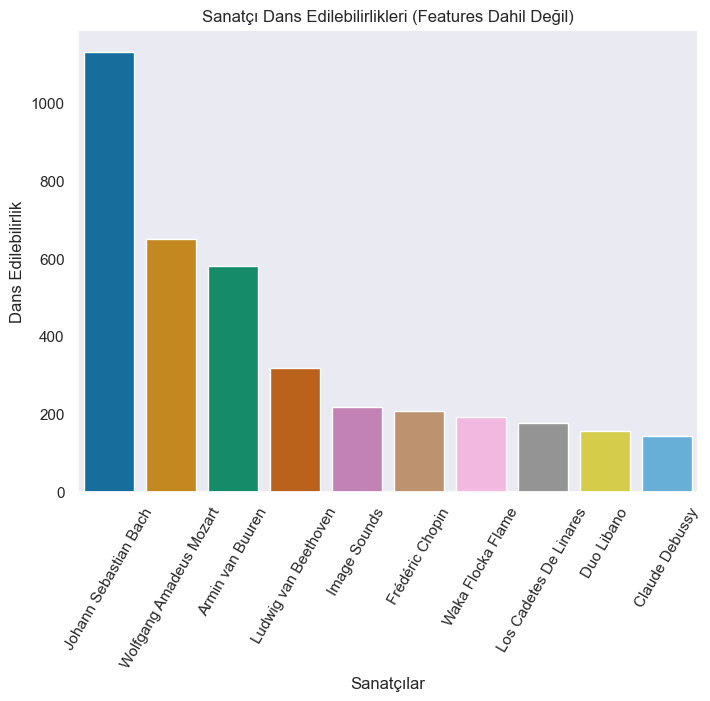

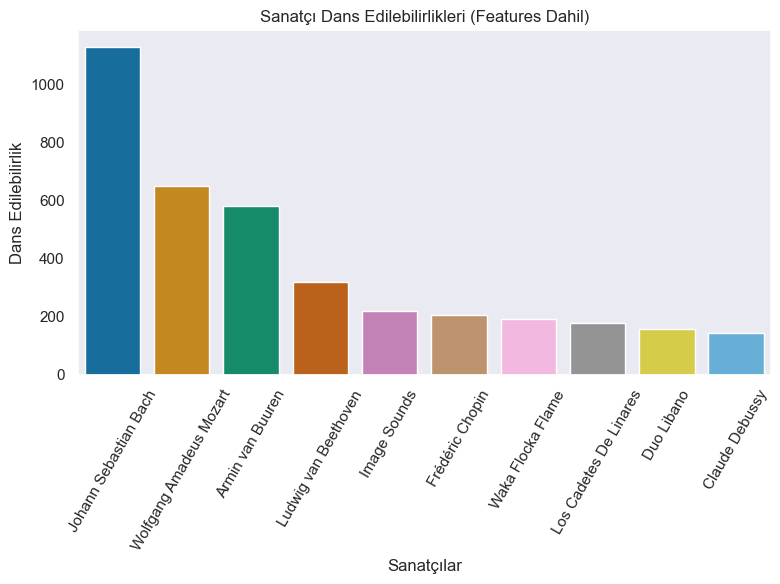

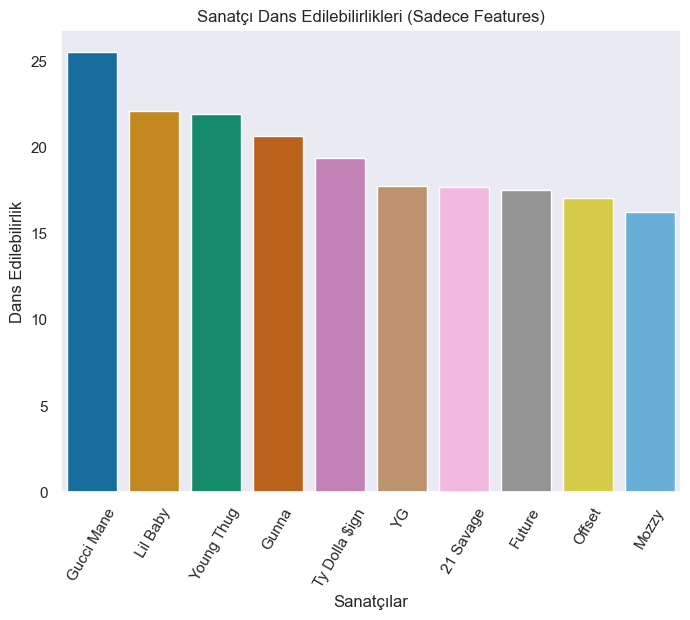

In [39]:
sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='danceability', data=danceability.sort_values(by="danceability", ascending=False)[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Dans Edilebilirlik")
plt.title("Sanatçı Dans Edilebilirlikleri (Features Dahil Değil)")

plt.xticks(rotation=60)

# Grafiği gösterme
plt.show()

sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='danceability', data=danceabilitywithfeaters[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Dans Edilebilirlik")
plt.title("Sanatçı Dans Edilebilirlikleri (Features Dahil)")

plt.xticks(rotation=60)
plt.tight_layout()  # Grafikleri sığdırma
plt.savefig("grafik5.png")
# Grafiği gösterme
plt.show()

sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='danceability', data=featersdanceability[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Dans Edilebilirlik")
plt.title("Sanatçı Dans Edilebilirlikleri (Sadece Features)")

plt.xticks(rotation=60)

# Grafiği gösterme
plt.show()

In [40]:
filtered_danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["artist_name","danceability"]].groupby('artist_name').sum().sort_values(by="danceability", ascending=False).reset_index().copy()
filtered_feater1danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater1","danceability"]].groupby('feater1').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater1":"artist_name"}).copy()
filtered_feater2danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater2","danceability"]].groupby('feater2').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater2":"artist_name"}).copy()
filtered_feater3danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater3","danceability"]].groupby('feater3').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater3":"artist_name"}).copy()
filtered_feater4danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater4","danceability"]].groupby('feater4').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater4":"artist_name"}).copy()
filtered_feater5danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater5","danceability"]].groupby('feater5').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater5":"artist_name"}).copy()
filtered_feater6danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater6","danceability"]].groupby('feater6').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater6":"artist_name"}).copy()
filtered_feater7danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater7","danceability"]].groupby('feater7').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater7":"artist_name"}).copy()
filtered_feater8danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater8","danceability"]].groupby('feater8').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater8":"artist_name"}).copy()
filtered_feater9danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater9","danceability"]].groupby('feater9').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater9":"artist_name"}).copy()
filtered_feater10danceability = data[data['danceability'] >= data['danceability'].quantile(0.75)][["feater10","danceability"]].groupby('feater10').sum().sort_values(by="danceability", ascending=False).reset_index().rename(columns={"feater10":"artist_name"}).copy()
filtered_featersdanceability = pd.concat([filtered_feater1danceability,filtered_feater2danceability,filtered_feater3danceability,filtered_feater4danceability,filtered_feater5danceability,filtered_feater6danceability,filtered_feater7danceability,filtered_feater8danceability,filtered_feater9danceability,filtered_feater10danceability]).groupby('artist_name').sum().reset_index().sort_values(by="danceability", ascending=False)
filtered_featersdanceability.reset_index(drop=True, inplace=True)
filtered_danceabilitywithfeaters = pd.concat([filtered_danceability,filtered_featersdanceability]).groupby('artist_name').sum().reset_index().sort_values(by="danceability", ascending=False)
filtered_danceabilitywithfeaters.reset_index(drop=True, inplace=True)

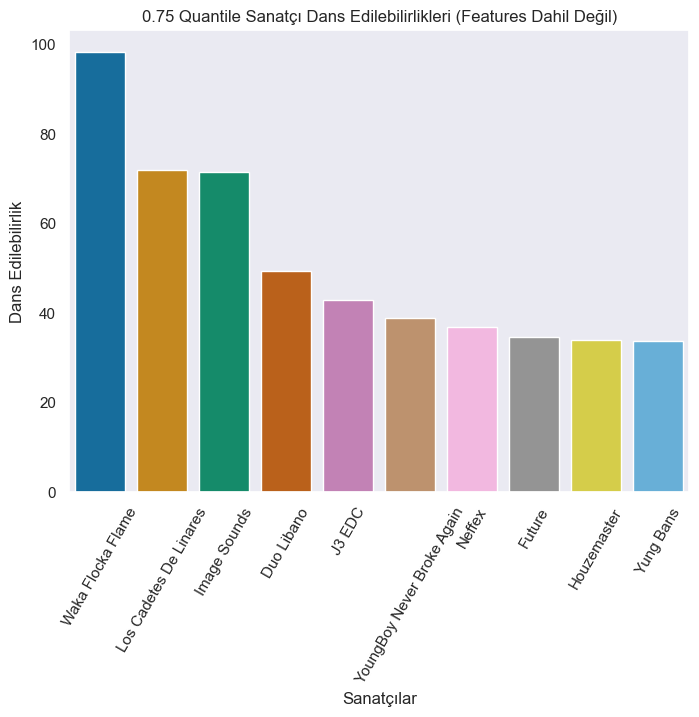

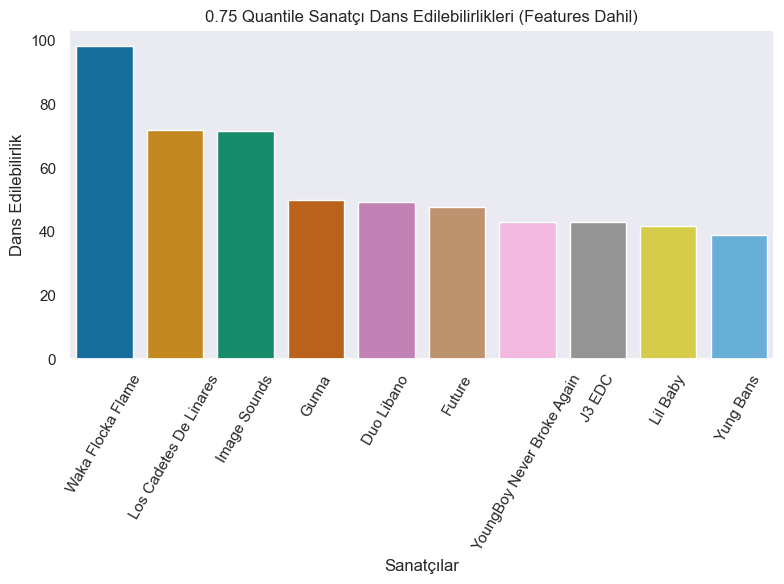

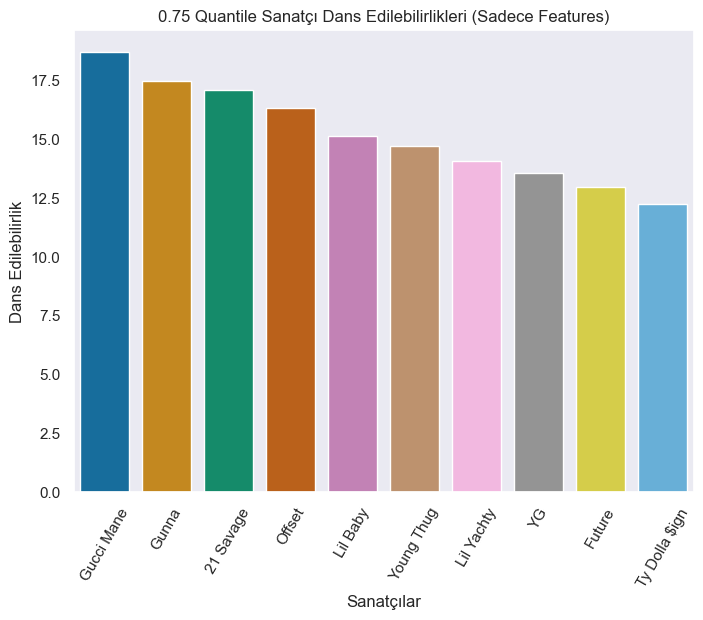

In [41]:
sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='danceability', data=filtered_danceability.sort_values(by="danceability", ascending=False)[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Dans Edilebilirlik")
plt.title("0.75 Quantile Sanatçı Dans Edilebilirlikleri (Features Dahil Değil)")

plt.xticks(rotation=60)

# Grafiği gösterme
plt.show()

sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='danceability', data=filtered_danceabilitywithfeaters[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Dans Edilebilirlik")
plt.title("0.75 Quantile Sanatçı Dans Edilebilirlikleri (Features Dahil)")

plt.xticks(rotation=60)
plt.tight_layout()  # Grafikleri sığdırma
plt.savefig("grafik5.png")
# Grafiği gösterme
plt.show()

sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='artist_name', y='danceability', data=filtered_featersdanceability[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Sanatçılar")
plt.ylabel("Dans Edilebilirlik")
plt.title("0.75 Quantile Sanatçı Dans Edilebilirlikleri (Sadece Features)")

plt.xticks(rotation=60)

# Grafiği gösterme
plt.show()

# ENSTRÜMENTALLİĞİ YÜKSEK ŞARKILAR

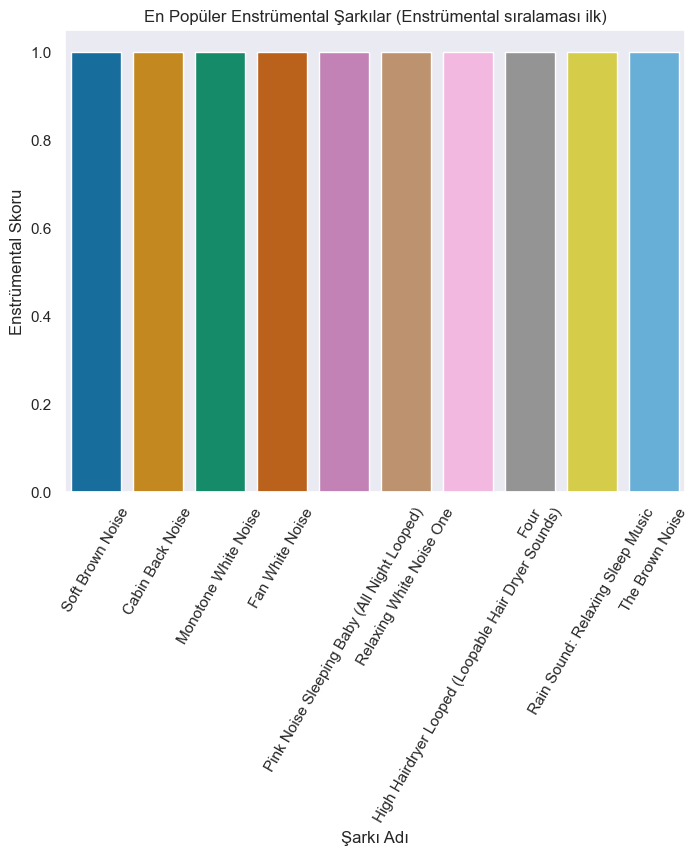

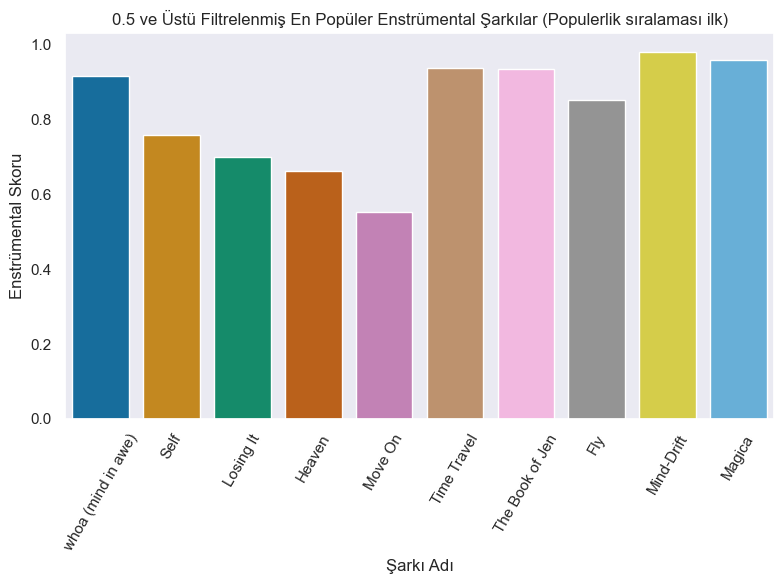

In [42]:
sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='track_name', y='instrumentalness', data=data.sort_values(by=["instrumentalness","popularity"], ascending=False)[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Şarkı Adı")
plt.ylabel("Enstrümental Skoru")
plt.title("En Popüler Enstrümental Şarkılar (Enstrümental sıralaması ilk)")

plt.xticks(rotation=60)

# Grafiği gösterme
plt.show()

sns.set(style="dark")
plt.figure(figsize=(8, 6))
sns.barplot(x='track_name', y='instrumentalness', data=data.loc[data["instrumentalness"] >= 0.5].sort_values(by=["popularity","instrumentalness"], ascending=False)[:10], palette="colorblind")

# Eksen etiketleri ve başlık ekleme
plt.xlabel("Şarkı Adı")
plt.ylabel("Enstrümental Skoru")
plt.title("0.5 ve Üstü Filtrelenmiş En Popüler Enstrümental Şarkılar (Populerlik sıralaması ilk)")

plt.xticks(rotation=60)
plt.tight_layout()  # Grafikleri sığdırma
plt.savefig("grafik6.png")
# Grafiği gösterme
plt.show()

# POPÜLERLİĞE GÖRE AKUSTİKLİK PASTASI

In [43]:
popularsongs = data.loc[(data["popularity"] >= 70)].copy()

popularsongs.loc[(popularsongs["popularity"] >= 70) & (popularsongs["acousticness"] <= 0.25), "acoustic_level"] = "low"
popularsongs.loc[(popularsongs["popularity"] >= 70) & (popularsongs["acousticness"] > 0.25) & (popularsongs["acousticness"] <= 0.50), "acoustic_level"] = "mid"
popularsongs.loc[(popularsongs["popularity"] >= 70) & (popularsongs["acousticness"] > 0.50) & (popularsongs["acousticness"] <= 0.74), "acoustic_level"] = "high"
popularsongs.loc[(popularsongs["popularity"] >= 70) & (popularsongs["acousticness"] >= 0.75), "acoustic_level"] = "extreme"

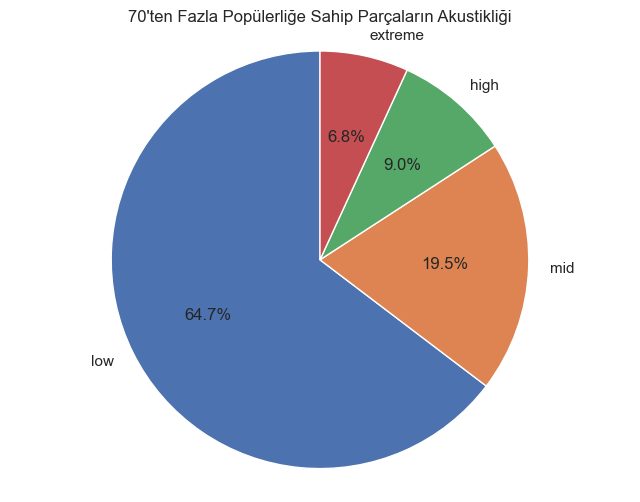

In [44]:
# Plot pie chart
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
sns.set(style="dark")
plt.title("70'ten Fazla Popülerliğe Sahip Parçaların Akustikliği")
plt.pie(data=popularsongs["acoustic_level"].value_counts().reset_index(drop=False), x="acoustic_level", labels="index", autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.savefig("grafik7.png")
plt.show()